# Analyzing scraped data of used cars from eBay Kleinanzeigen

This is a dataquest guided project where I worked on a dataset of used cars data from eBay Kleinanzeigen, a classified section of the German eBay website.

Some changes were made to the dataset only 50000 data points were taken from the original dataset in order to reduce run time.
The some errors were also added to the dataset in order to create tasks to do.

Data dictionary:

- dateCrawled: When this ad was first crawled.
- name: Name of the car.
- seller:  Whether the seller is private or a dealer.
- offerType: The type of listing
- price: The price on the ad to sell the car.
- abtest: Whether the listing is included in an A/B test.
- vehicleType: The vehicle Type.
- yearOfRegistration: The year in which which year the car was first registered.
- gearbox: The transmission type.
- powerPS: The power of the car in PS.
- model: The car model name.
- kilometer: How many kilometers the car has driven.
- monthOfRegistration: The month in which which year the car was first registered.
- fuelType: What type of fuel the car uses.
- brand: The brand of the car.
- notRepairedDamage: If the car has a damage which is not yet repaired.
- dateCreated: The date on which the eBay listing was created.
- nrOfPictures: The number of pictures in the ad.
- postalCode - The postal code for the location of the vehicle.
- lastSeenOnline - When the crawler saw this ad last online.

### Business Questions
1. Which cars are the most common cars in the listings?
2. Which cars are most expensive and why?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
autos = pd.read_csv('autos.csv', encoding = 'Latin-1' )
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [3]:
autos.shape

(50000, 20)

In [4]:
autos.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

I will be renaming the columns because they do not follow the python naming convention, also to be able to work easily with the data.

In [5]:
#remain columns
autos.columns = ['date_crawled', 'name', 'seller', 'offer_type', 'price', 'ab_test',
       'vehicle_type', 'registration_year', 'gearbox', 'power_ps', 'model',
       'odometer', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'num_photos', 'postal_code',
       'last_seen']

Some columns in the dataframe contain, german words I would translate these words to english

In [6]:
#translate german words
words_translated = {
    'limousine':'limousine',
    'kleinwagen':'supermini',
    'kombi':'station_wagon',
    'bus':'bus',
    'cabrio':'cabrio',
    'coupe':'coupe',
    'suv':'suv',
    'andere' :'other',
    'manuell':'manual',
    'automatik':'automatic',
    'Angebot':'offer',
    'Gesuch':'request',
    'benzin':'petrol',
    'diesel':'diesel',
    'lpg':'lpg',
    'cng':'cng',
    'hybrid':'hybrid',
    'elektro':'electro',
    'nein':'no',
    'ja':'yes'
}
for col in ['vehicle_type','gearbox','fuel_type','unrepaired_damage']:
    autos[col] = autos[col].map(words_translated)

In [7]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   date_crawled        50000 non-null  object
 1   name                50000 non-null  object
 2   seller              50000 non-null  object
 3   offer_type          50000 non-null  object
 4   price               50000 non-null  object
 5   ab_test             50000 non-null  object
 6   vehicle_type        44905 non-null  object
 7   registration_year   50000 non-null  int64 
 8   gearbox             47320 non-null  object
 9   power_ps            50000 non-null  int64 
 10  model               47242 non-null  object
 11  odometer            50000 non-null  object
 12  registration_month  50000 non-null  int64 
 13  fuel_type           45518 non-null  object
 14  brand               50000 non-null  object
 15  unrepaired_damage   40171 non-null  object
 16  ad_created          50

Odometer and price columns are numeric values stored as a text. Theses column have the wrong datatype because their units are included. To clean these up, we'll remove the units.

In [8]:
autos.describe(include='all')

,date_crawled,name,seller,offer_type,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,num_photos,postal_code,last_seen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-04-04 16:40:33,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manual,NaN,golf,"150,000km",NaN,petrol,volkswagen,no,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


Looking at the output above, the seller and offer type contain only 2 unique values and do not add any important information to the data, so I'm going to drop them.

In [9]:
autos.isnull().sum()

date_crawled             0
name                     0
seller                   0
offer_type               0
price                    0
ab_test                  0
vehicle_type          5095
registration_year        0
gearbox               2680
power_ps                 0
model                 2758
odometer                 0
registration_month       0
fuel_type             4482
brand                    0
unrepaired_damage     9829
ad_created               0
num_photos               0
postal_code              0
last_seen                0
dtype: int64

In [10]:
(autos.isnull().sum() / autos.shape[0]) * 100

date_crawled           0.000
name                   0.000
seller                 0.000
offer_type             0.000
price                  0.000
ab_test                0.000
vehicle_type          10.190
registration_year      0.000
gearbox                5.360
power_ps               0.000
model                  5.516
odometer               0.000
registration_month     0.000
fuel_type              8.964
brand                  0.000
unrepaired_damage     19.658
ad_created             0.000
num_photos             0.000
postal_code            0.000
last_seen              0.000
dtype: float64

The dataset contains missing values

There are missing values in the vehicle_type, gear_box, model, fuel_type and unrepaired_damage columns but none up to 20% missing values

In [11]:
#cleaning price and odometer columns
print(autos['price'].unique())
print('\n')
print(autos['odometer'].unique())

['$5,000' '$8,500' '$8,990' ... '$385' '$22,200' '$16,995']


['150,000km' '70,000km' '50,000km' '80,000km' '10,000km' '30,000km'
 '125,000km' '90,000km' '20,000km' '60,000km' '5,000km' '100,000km'
 '40,000km']


In [12]:
autos["price"] = (autos["price"]
                          .str.replace("$","")
                          .str.replace(",","")
                          .astype(int)
                          )

autos["odometer"] = (autos["odometer"]
                             .str.replace("km","")
                             .str.replace(",","")
                             .astype(int)
                             )
autos.rename({"odometer": "odometer_km"}, axis=1, inplace=True)

In [13]:
print(autos['price'].unique())
print('\n')
print(autos['odometer_km'].unique())

[ 5000  8500  8990 ...   385 22200 16995]


[150000  70000  50000  80000  10000  30000 125000  90000  20000  60000
   5000 100000  40000]


In [14]:
#drop columns that do not contain enough unique values
autos = autos.drop(["num_photos", "seller", "offer_type"], axis=1)

In [15]:
autos['price'].value_counts(ascending=False).head()

0       1421
500      781
1500     734
2500     643
1000     639
Name: price, dtype: int64

In [16]:
autos['odometer_km'].value_counts(ascending=False).head()

150000    32424
125000     5170
100000     2169
90000      1757
80000      1436
Name: odometer_km, dtype: int64

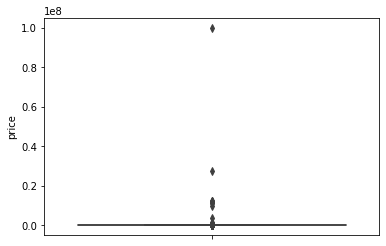

In [17]:
sns.boxplot(y='price', data=autos)

The odometer column looks alright, but in price column there are cars with $0 that's impossible so we'll drop them; they also account for just a small quantity of the dataset; we'll also remove values higher than 350000, because the prices started increasing erroneously after that value and they represent outliers.

In [18]:
autos = autos[autos['price'] != 0]
autos = autos[autos['price'] <= 350000]
autos['price'].value_counts(ascending=False).head()

500     781
1500    734
2500    643
1200    639
1000    639
Name: price, dtype: int64

### Date Columns
They are:
- date_crawled: added by the crawler  (saved as object)
- last_seen: added by the crawler   (saved as object)
- ad_created: from the website   (saved as object)
- registration_month: from the website
- registration_year: from the website

In [19]:
autos[['date_crawled','ad_created','last_seen']][0:5]

,date_crawled,ad_created,last_seen
0,2016-03-26 17:47:46,2016-03-26 00:00:00,2016-04-06 06:45:54
1,2016-04-04 13:38:56,2016-04-04 00:00:00,2016-04-06 14:45:08
2,2016-03-26 18:57:24,2016-03-26 00:00:00,2016-04-06 20:15:37
3,2016-03-12 16:58:10,2016-03-12 00:00:00,2016-03-15 03:16:28
4,2016-04-01 14:38:50,2016-04-01 00:00:00,2016-04-01 14:38:50


In [20]:
(autos['date_crawled'].str[:10].value_counts(normalize=True, dropna=False)
        .sort_values())

2016-04-07    0.001400
2016-04-06    0.003171
2016-03-18    0.012911
2016-04-05    0.013096
2016-03-06    0.014043
2016-03-13    0.015670
2016-03-05    0.025327
2016-03-24    0.029342
2016-03-16    0.029610
2016-03-27    0.031092
2016-03-25    0.031607
2016-03-17    0.031628
2016-03-31    0.031834
2016-03-10    0.032184
2016-03-26    0.032204
2016-03-23    0.032225
2016-03-11    0.032575
2016-03-22    0.032987
2016-03-09    0.033090
2016-03-08    0.033296
2016-04-01    0.033687
2016-03-30    0.033687
2016-03-29    0.034099
2016-03-15    0.034284
2016-03-19    0.034778
2016-03-28    0.034860
2016-04-02    0.035478
2016-03-07    0.036014
2016-04-04    0.036487
2016-03-14    0.036549
2016-03-12    0.036920
2016-03-21    0.037373
2016-03-20    0.037887
2016-04-03    0.038608
Name: date_crawled, dtype: float64

In [21]:
(autos['ad_created'].str[:10].value_counts(normalize=True, dropna=False)
        .sort_values()
        )

2015-08-10    0.000021
2016-01-07    0.000021
2016-02-01    0.000021
2016-01-16    0.000021
2016-01-03    0.000021
                ...   
2016-03-12    0.036755
2016-04-04    0.036858
2016-03-21    0.037579
2016-03-20    0.037949
2016-04-03    0.038855
Name: ad_created, Length: 76, dtype: float64

In [22]:
(autos['last_seen'].str[:10].value_counts(normalize=True, dropna=False)
        .sort_values()
        )

2016-03-05    0.001071
2016-03-06    0.004324
2016-03-07    0.005395
2016-03-18    0.007351
2016-03-08    0.007413
2016-03-13    0.008895
2016-03-09    0.009595
2016-03-10    0.010666
2016-03-11    0.012375
2016-03-14    0.012602
2016-03-27    0.015649
2016-03-19    0.015834
2016-03-15    0.015876
2016-03-16    0.016452
2016-03-26    0.016802
2016-03-23    0.018532
2016-03-25    0.019211
2016-03-24    0.019767
2016-03-21    0.020632
2016-03-20    0.020653
2016-03-28    0.020859
2016-03-22    0.021373
2016-03-29    0.022341
2016-04-01    0.022794
2016-03-12    0.023783
2016-03-31    0.023783
2016-04-04    0.024483
2016-03-30    0.024771
2016-04-02    0.024915
2016-04-03    0.025203
2016-03-17    0.028086
2016-04-05    0.124761
2016-04-07    0.131947
2016-04-06    0.221806
Name: last_seen, dtype: float64

-Looks like the site was crawled daily over roughly a one month period in March and April 2016. The distribution of listings crawled on each day is roughly uniform.

-There is a large variety of ad created dates. Most fall within 1-2 months of the listing date, but a few are quite old, with the oldest at around 9 months.
-the crawler recorded the date it last saw any listing, which allows us to determine on what day a listing was removed, presumably because the car was sold.

The last three days contain a disproportionate amount of 'last seen' values. Given that these are 6-10x the values from the previous days, it's unlikely that there was a massive spike in sales, and more likely that these values are to do with the crawling period ending and don't indicate car sales.

In [23]:
autos['registration_year'].describe()

count    48565.000000
mean      2004.755421
std         88.643887
min       1000.000000
25%       1999.000000
50%       2004.000000
75%       2008.000000
max       9999.000000
Name: registration_year, dtype: float64

In [24]:
autos["registration_year"].value_counts()

2000    3156
2005    2936
1999    2897
2004    2703
2003    2699
        ... 
9000       1
1948       1
1000       1
1931       1
1952       1
Name: registration_year, Length: 95, dtype: int64

In [25]:
#proportion of cars registered before 1900 and after 2016
(~autos["registration_year"].between(1900,2016)).sum() / autos.shape[0]

0.038793369710697

Cars with dates earlier than 1900 and later than 2016 will be removed, they are less than 4% of the data.

In [26]:
autos = autos[autos["registration_year"].between(1900,2016)]
autos["registration_year"].value_counts(normalize=True).head(10)

2000    0.067608
2005    0.062895
1999    0.062060
2004    0.057904
2003    0.057818
2006    0.057197
2001    0.056468
2002    0.053255
1998    0.050620
2007    0.048778
Name: registration_year, dtype: float64

### Brands

In [27]:
autos["brand"].unique()

array(['peugeot', 'bmw', 'volkswagen', 'smart', 'ford', 'chrysler',
       'seat', 'renault', 'mercedes_benz', 'audi', 'sonstige_autos',
       'opel', 'mazda', 'porsche', 'mini', 'toyota', 'dacia', 'nissan',
       'jeep', 'saab', 'volvo', 'mitsubishi', 'jaguar', 'fiat', 'skoda',
       'subaru', 'kia', 'citroen', 'chevrolet', 'hyundai', 'honda',
       'daewoo', 'suzuki', 'trabant', 'land_rover', 'alfa_romeo', 'lada',
       'rover', 'daihatsu', 'lancia'], dtype=object)

The brand feature is the one feature that fully differentiates the cars from one another. I will carry out some aggregate analysis on the different car brands.


1. Pull out the 5 most common brands

In [28]:
autos["brand"].value_counts(normalize=True)

volkswagen        0.211264
bmw               0.110045
opel              0.107581
mercedes_benz     0.096463
audi              0.086566
ford              0.069900
renault           0.047150
peugeot           0.029841
fiat              0.025642
seat              0.018273
skoda             0.016409
nissan            0.015274
mazda             0.015188
smart             0.014160
citroen           0.014010
toyota            0.012703
hyundai           0.010025
sonstige_autos    0.009811
volvo             0.009147
mini              0.008762
mitsubishi        0.008226
honda             0.007840
kia               0.007069
alfa_romeo        0.006641
porsche           0.006127
suzuki            0.005934
chevrolet         0.005698
chrysler          0.003513
dacia             0.002635
daihatsu          0.002506
jeep              0.002271
subaru            0.002142
land_rover        0.002099
saab              0.001649
jaguar            0.001564
daewoo            0.001500
trabant           0.001392
r

In [29]:
common_brands = autos["brand"].value_counts(normalize=True).sort_values(ascending=False).head(5)
common_brands

volkswagen       0.211264
bmw              0.110045
opel             0.107581
mercedes_benz    0.096463
audi             0.086566
Name: brand, dtype: float64

Volkswagen is the most common car brand making up over 21% of the whole data.

2. Get the mean price of the most common brands

In [30]:
brand_mean_prices = {}

for brand in common_brands.index:
    common_brand_only = autos[autos["brand"] == brand]
    mean_price = common_brand_only["price"].mean()
    brand_mean_prices[brand] = int(mean_price)

print(brand_mean_prices)

{'volkswagen': 5402, 'bmw': 8332, 'opel': 2975, 'mercedes_benz': 8628, 'audi': 9336}


Of the top 5 brands, there is a distinct price gap:

- Audi, BMW and Mercedes Benz are more expensive
- Ford and Opel are less expensive
- Volkswagen is in between - this may explain its popularity, it may be a 'best of both worlds' option.

In [31]:
mean_prices = pd.Series(brand_mean_prices).sort_values(ascending=False)
mean_prices

audi             9336
mercedes_benz    8628
bmw              8332
volkswagen       5402
opel             2975
dtype: int64

In [32]:
brand_mean_mileage = {}

for brand in common_brands.index:
    common_brand_only = autos[autos["brand"] == brand]
    mean_mileage = common_brand_only["odometer_km"].mean()
    brand_mean_mileage[brand] = int(mean_mileage)

mean_mileage = pd.Series(brand_mean_mileage).sort_values(ascending=False)
mean_mileage

bmw              132572
mercedes_benz    130788
opel             129310
audi             129157
volkswagen       128707
dtype: int64

In [33]:
brand_info = pd.DataFrame(mean_mileage,columns=['mean_mileage'])
brand_info["mean_price"] = mean_prices
brand_info

,mean_mileage,mean_price
bmw,132572,8332
mercedes_benz,130788,8628
opel,129310,2975
audi,129157,9336
volkswagen,128707,5402


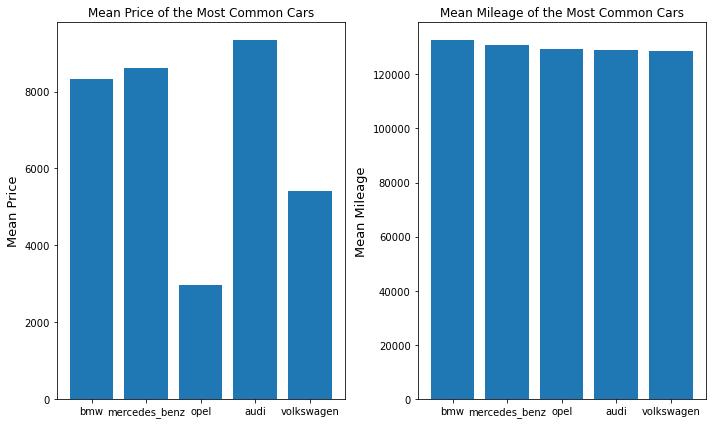

In [34]:
plt.figure(figsize=(10, 6))

plt.subplot(1,2,1)
plt.bar(brand_info.index, height=brand_info['mean_price'], label='mean_price')
plt.ylabel('Mean Price', fontsize=13)
plt.title('Mean Price of the Most Common Cars')

plt.subplot(1,2,2)
plt.bar(brand_info.index, height=brand_info['mean_mileage'], label='mean_mileage')
plt.ylabel('Mean Mileage', fontsize=13)
plt.title('Mean Mileage of the Most Common Cars')

plt.tight_layout()
plt.show()

The range of car mileages does not vary as much as the prices do by brand, instead all fall within 10% for the top brands. There is a slight trend to the more expensive vehicles having higher mileage, with the less expensive vehicles having lower mileage.

Let's take a look at the prices and mileages of all the brands in the dataset

**Price**

In [35]:
autos['brand'].value_counts().sort_values(ascending=False)

volkswagen        9862
bmw               5137
opel              5022
mercedes_benz     4503
audi              4041
ford              3263
renault           2201
peugeot           1393
fiat              1197
seat               853
skoda              766
nissan             713
mazda              709
smart              661
citroen            654
toyota             593
hyundai            468
sonstige_autos     458
volvo              427
mini               409
mitsubishi         384
honda              366
kia                330
alfa_romeo         310
porsche            286
suzuki             277
chevrolet          266
chrysler           164
dacia              123
daihatsu           117
jeep               106
subaru             100
land_rover          98
saab                77
jaguar              73
daewoo              70
trabant             65
rover               62
lancia              50
lada                27
Name: brand, dtype: int64

In [36]:
avg_brand_price = autos.groupby('brand')['price'].mean()
avg_brand_price = pd.DataFrame(avg_brand_price)
avg_brand_price.reset_index(inplace=True)
avg_brand_price.sort_values(by='price',ascending=False, inplace=True)
avg_brand_price

,brand,price
26,porsche,45643.937063
18,land_rover,19108.091837
33,sonstige_autos,12338.550218
14,jeep,11650.500000
13,jaguar,11635.493151
21,mini,10613.459658
1,audi,9336.687454
20,mercedes_benz,8628.450366
2,bmw,8332.820518
3,chevrolet,6684.139098


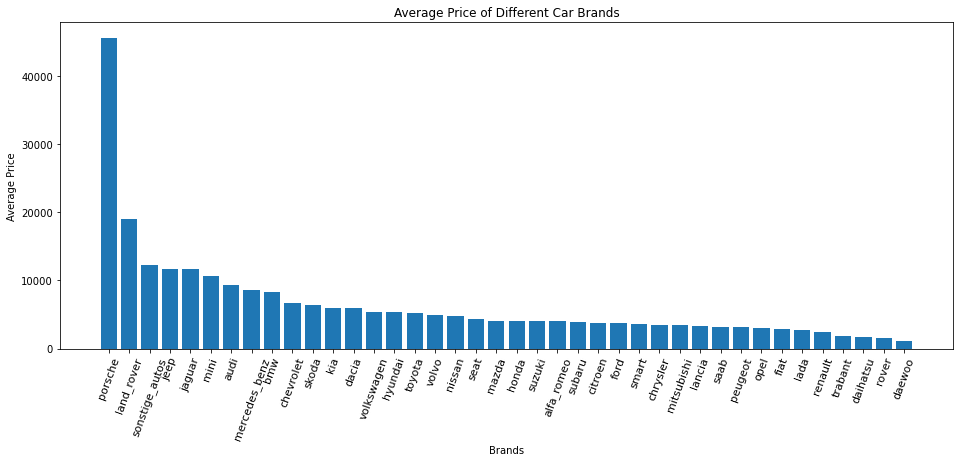

In [37]:
plt.figure(figsize=(16, 6))
plt.bar(avg_brand_price['brand'], avg_brand_price['price'], )
plt.xticks(rotation=70, fontsize=11)
plt.xlabel('Brands')
plt.ylabel('Average Price')
plt.title('Average Price of Different Car Brands')
plt.show()

Porshe is by far the most expensive brand on a average (more than 2 times more than the second most expensive car), and was listed 286 times which is a lot compared to 70 times for the least expensive car 'daewoo'. 

Another noticeable thing is the fact that wide price variations reduced after chevrolet and maintained a steady, almost unidentifiable drop.

In [38]:
avg_brand_mile = autos.groupby('brand')['odometer_km'].mean()
avg_brand_mile = pd.DataFrame(avg_brand_mile)
avg_brand_mile.reset_index(inplace=True)
avg_brand_mile.sort_values(by='odometer_km',ascending=False, inplace=True)
avg_brand_mile

,brand,odometer_km
29,saab,144415.584416
39,volvo,138067.915691
28,rover,137661.290323
2,bmw,132572.513140
4,chrysler,132378.048780
0,alfa_romeo,131338.709677
20,mercedes_benz,130788.363313
24,opel,129310.035842
1,audi,129157.386785
38,volkswagen,128707.158791


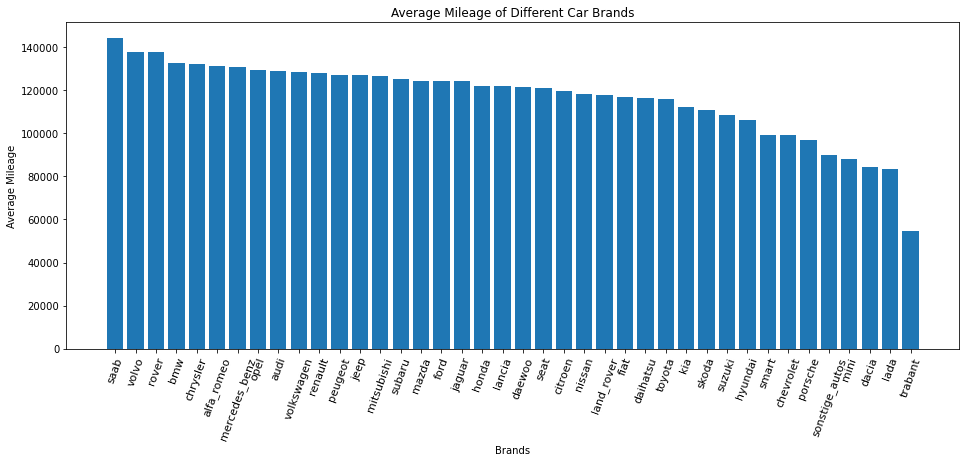

In [39]:
plt.figure(figsize=(16, 6))
plt.bar(avg_brand_mile['brand'], avg_brand_mile['odometer_km'])
plt.xticks(rotation=70, fontsize=11)
plt.xlabel('Brands')
plt.ylabel('Average Mileage')
plt.title('Average Mileage of Different Car Brands')
plt.show()

Saabs have the highest average mileage but is closely followed by volvo. There is not a lot of variation in the mileage of all cars generally, but the Trabant brand has the lowest mileage which is less than half of Saab's mileage.

### Vehicle Types

In [40]:
autos['vehicle_type'].value_counts()

limousine        12598
supermini        10585
station_wagon     8930
bus               4031
cabrio            3016
coupe             2462
suv               1965
other              390
Name: vehicle_type, dtype: int64

In [41]:
###Price by vehicle types
avg_veh_price = autos.groupby('vehicle_type')['price'].mean()
avg_veh_price = pd.DataFrame(avg_veh_price)
avg_veh_price.reset_index(inplace=True)
avg_veh_price.sort_values(by='price',ascending=False, inplace=True)
avg_veh_price

,vehicle_type,price
7,suv,13407.183715
2,coupe,11731.207961
1,cabrio,10786.965186
0,bus,6667.593649
3,limousine,5958.511510
5,station_wagon,5802.211758
4,other,4457.410256
6,supermini,2746.161077


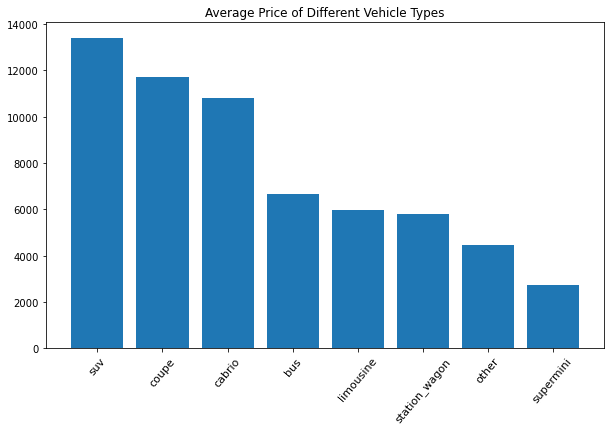

In [42]:
plt.figure(figsize=(10, 6))
plt.bar(avg_veh_price['vehicle_type'], avg_veh_price['price'], )
plt.xticks(rotation=50, fontsize=11)
plt.title('Average Price of Different Vehicle Types')
plt.show()

In [43]:
##### mileage by vehicle type
avg_veh_mile = autos.groupby('vehicle_type')['odometer_km'].mean()
avg_veh_mile = pd.DataFrame(avg_veh_mile)
avg_veh_mile.reset_index(inplace=True)
avg_veh_mile.sort_values(by='odometer_km',ascending=False, inplace=True)
avg_veh_mile

,vehicle_type,odometer_km
5,station_wagon,135936.170213
0,bus,129388.489209
3,limousine,128055.643753
4,other,124205.128205
2,coupe,120174.654752
6,supermini,119501.653283
7,suv,113580.152672
1,cabrio,112606.100796


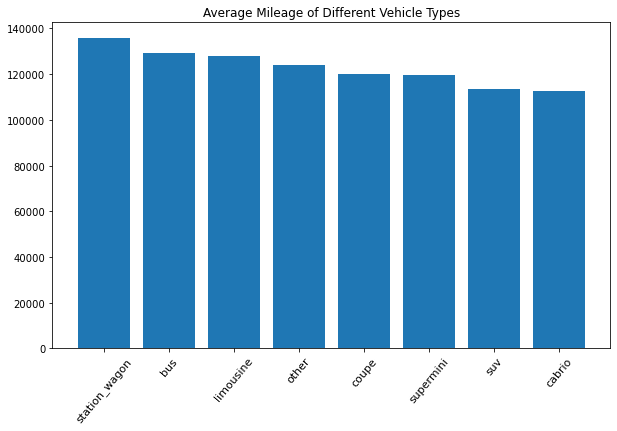

In [44]:
plt.figure(figsize=(10, 6))
plt.bar(avg_veh_mile['vehicle_type'], avg_veh_mile['odometer_km'], )
plt.xticks(rotation=50, fontsize=11)
plt.title('Average Mileage of Different Vehicle Types')
plt.show()

### Fuel Type

Text(0.5, 1.0, 'Fuel types by Brand')

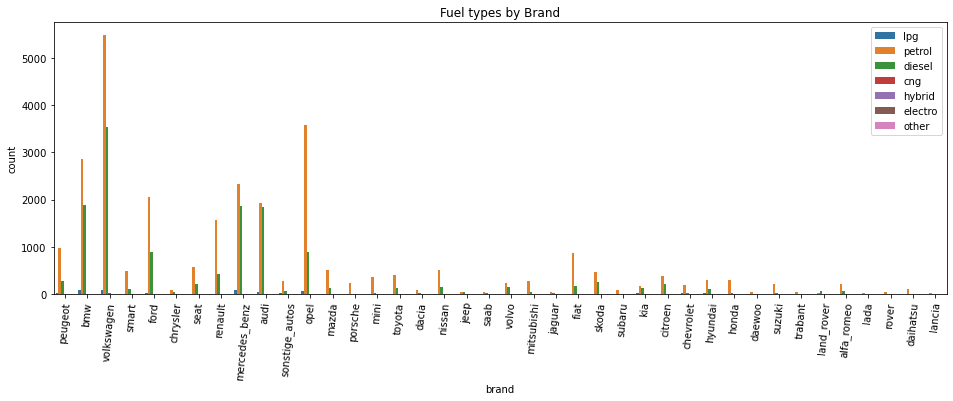

In [45]:
plt.figure(figsize=(16,5))
sns.countplot(x='brand', hue='fuel_type', data=autos)
plt.legend(loc='upper right')
plt.xticks(rotation=85)
plt.title('Fuel types by Brand')

The bars above are not all legible but its obvious that petrol is the most common fuel type in all the cars.

Which brands have electric cars?

In [46]:
electric_cars = autos[autos['fuel_type'] == 'electro']
electric_cars['brand'].value_counts()

sonstige_autos    7
renault           5
bmw               2
smart             2
volkswagen        1
peugeot           1
daihatsu          1
Name: brand, dtype: int64

In [47]:
autos['price'].value_counts()

500      757
1500     696
2500     614
1200     606
1000     602
        ... 
34940      1
4239       1
173        1
205        1
17799      1
Name: price, Length: 2323, dtype: int64

## Conclusion

The most popular car listed on the german ebay is Volkwagen and this could be because of its price, its not too expensive and not too cheap so people ca keep up with standards while living within their means.

The most expensive cars in this listing are Porshes and the reason is very obvious.